In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
%matplotlib inline
df=pd.read_csv("penjualan.csv")
df.head()

,Tanggal,Produk,Kategori,Harga,Jumlah
0,2025-06-01,Teh Botol,Minuman,3000,10
1,2025-06-01,Indomie Goreng,Makanan,2500,15
2,2025-06-01,Chitato,Snack,8000,5
3,2025-06-02,Aqua Botol,Minuman,4000,12
4,2025-06-02,SilverQueen Coklat,Snack,10000,6


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Tanggal   6 non-null      object
 1   Produk    6 non-null      object
 2   Kategori  6 non-null      object
 3   Harga     6 non-null      int64 
 4   Jumlah    6 non-null      int64 
dtypes: int64(2), object(3)
memory usage: 368.0+ bytes


In [7]:
df.describe()

,Harga,Jumlah
count,6.000000,6.000000
mean,5750.000000,9.333333
std,3029.026246,3.777124
min,2500.000000,5.000000
25%,3250.000000,6.500000
50%,5500.000000,9.000000
75%,7750.000000,11.500000
max,10000.000000,15.000000


In [11]:
df['Total']=df['Harga']*df['Jumlah']
df.head()

,Tanggal,Produk,Kategori,Harga,Jumlah,Total
0,2025-06-01,Teh Botol,Minuman,3000,10,30000
1,2025-06-01,Indomie Goreng,Makanan,2500,15,37500
2,2025-06-01,Chitato,Snack,8000,5,40000
3,2025-06-02,Aqua Botol,Minuman,4000,12,48000
4,2025-06-02,SilverQueen Coklat,Snack,10000,6,60000


In [12]:
produk_terlaris = df.groupby('Produk')['Total'].sum().sort_values(ascending=False)
print(produk_terlaris)


Produk
SilverQueen Coklat    60000
Pop Mie               56000
Aqua Botol            48000
Chitato               40000
Indomie Goreng        37500
Teh Botol             30000
Name: Total, dtype: int64


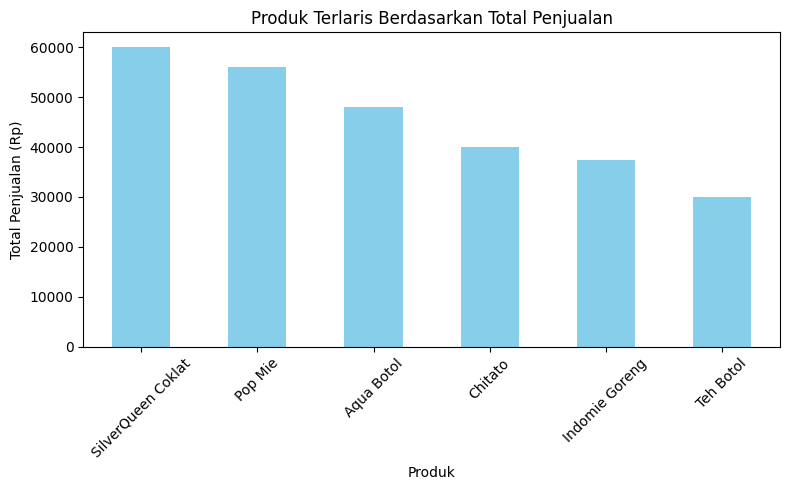

In [13]:
produk_terlaris.plot(kind='bar', figsize=(8, 5), color='skyblue')
plt.title("Produk Terlaris Berdasarkan Total Penjualan")
plt.ylabel("Total Penjualan (Rp)")
plt.xlabel("Produk")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


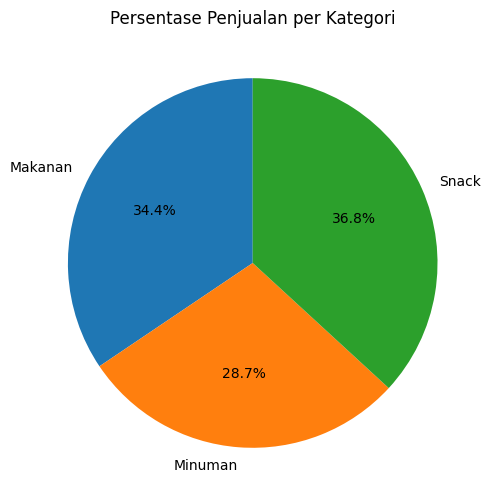

In [14]:
kategori_penjualan = df.groupby('Kategori')['Total'].sum()
kategori_penjualan.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6), startangle=90)
plt.title("Persentase Penjualan per Kategori")
plt.ylabel("")
plt.show()


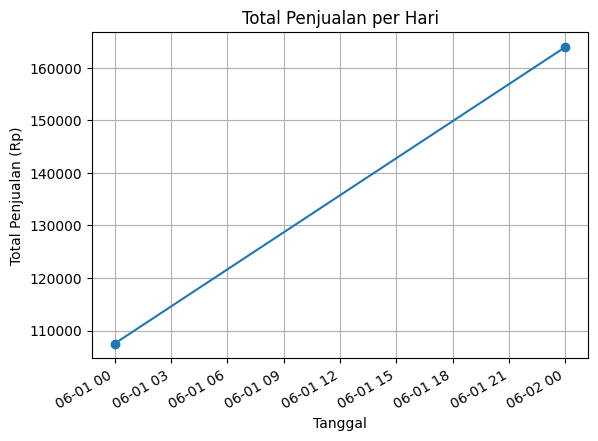

In [15]:
df['Tanggal'] = pd.to_datetime(df['Tanggal'])  # ubah ke datetime
penjualan_harian = df.groupby('Tanggal')['Total'].sum()

penjualan_harian.plot(marker='o', linestyle='-')
plt.title("Total Penjualan per Hari")
plt.ylabel("Total Penjualan (Rp)")
plt.xlabel("Tanggal")
plt.grid(True)
plt.show()


In [16]:
df.to_csv("penjualan_analisis.csv", index=False)
